## The Sparks Foundation - Data science & Business Analytics Internship (#GRIPAPRIL21)

### Author - Nikhil Ghadmode

 ### Task 1 -  Build a score prediction model using Simple Linear Regression (Supervised ML)

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

#### Importing necessary libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading the data 

In [3]:
data = "http://bit.ly/w-data"
data = pd.read_csv(data)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Understanding the Data

In [4]:
# Checking number of rows and columns
data.shape

(25, 2)

In [5]:
# Checking the type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Checking numerical values for the given data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Cheking for missing/null values
data.isna().sum()

Hours     0
Scores    0
dtype: int64

### Visualising the Data

#### Plotting the data to understand the relationship between variables

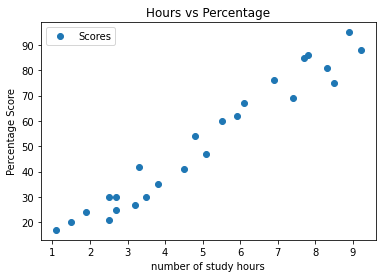

In [8]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('number of study hours')  
plt.ylabel('Percentage Score')  
plt.show()

#### As we can observe from the plot the variables are showing linear relationship.

### Building a Simple Linear Regression model

#### Steps will be performed for model building  :
- We will first assign the feature variable -"Hours" to the variable X and the response variable- "Score" to the variable y.
- The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

### Train-Test Split
- Splitting of variables into training and testing sets using sklearn.model_selection library.
- As a good practice will keep 70% of the data in train dataset and the rest 30% in test dataset.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [11]:
# Let's take a look at X_train data
X_train

array([[9.2],
       [4.5],
       [3.5],
       [7.8],
       [2.5],
       [5.1],
       [2.7],
       [1.1],
       [1.9],
       [6.1],
       [3.2],
       [7.7],
       [2.5],
       [8.9],
       [5.5],
       [8.5],
       [8.3]])

In [12]:
y_train

array([88, 41, 30, 86, 21, 47, 30, 17, 24, 67, 27, 85, 30, 95, 60, 75, 81],
      dtype=int64)

In [13]:
X_test

array([[2.7],
       [3.8],
       [3.3],
       [5.9],
       [1.5],
       [7.4],
       [6.9],
       [4.8]])

In [14]:
y_test

array([25, 35, 42, 62, 20, 69, 76, 54], dtype=int64)

### Training the model

In [15]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 
print("Training complete.")

Training complete.


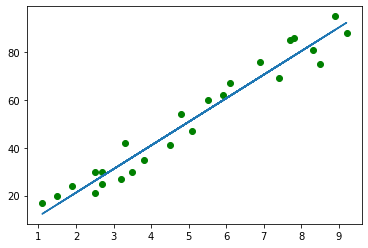

In [16]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y, c= 'g')
plt.plot(X, line);
plt.show()

#### As we can see in the above plot we have found our "Best fit line" for this data.

#### Checking Accuracy Scores for both training as well as testing sets

In [17]:
print("Training Score:",lr.score(X_train,y_train)*100)
print("Testing Score:",lr.score(X_test,y_test)*100)

Training Score: 95.70735354094693
Testing Score: 93.09458862687438


### Predictions on the Test dataset

- we have fitted a regression line on our train dataset, 
  now can make some predictions on the test data. 
- First step will be to add a constant to the X_test data like we did for X_train and 
  then we can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [18]:
y_test

array([25, 35, 42, 62, 20, 69, 76, 54], dtype=int64)

In [19]:
# Testing data - In Hours
print(X_test) 

# Predicting the scores
y_pred = lr.predict(X_test) 

[[2.7]
 [3.8]
 [3.3]
 [5.9]
 [1.5]
 [7.4]
 [6.9]
 [4.8]]


In [20]:
y_pred

array([28.14877107, 39.00765694, 34.07179972, 59.73825724, 16.30271375,
       74.54582888, 69.60997167, 48.87937137])

In [21]:
# Comparing the Actual vs Predicted scores
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe

,Actual,Predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714
5,69,74.545829
6,76,69.609972
7,54,48.879371


In [22]:
# Testing with our own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of study Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of study Hours = 9.25
Predicted Score = 92.80850057353504


### Evaluating the model

- To compare how well different algorithms perform on a particular dataset. we have chosen the mean square error. Also, there are many such metrics which we can choose.

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.762517892332273
Mean Squared Error: 25.678419573283847


## Conclusion:
- #### After evaluvating the model we have got a predicted score 92.8 based on the number of study hours = 9.25 hrs/day